In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

In [2]:
# Load the dataset
file_path = "/Users/DS Final Project/Base.csv"  # Replace with the actual file path
data = pd.read_csv(file_path)


In [3]:
# Display basic information about the dataset
print("Dataset Info:")
data.info()

print("\nDataset Head:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h            

In [4]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                           

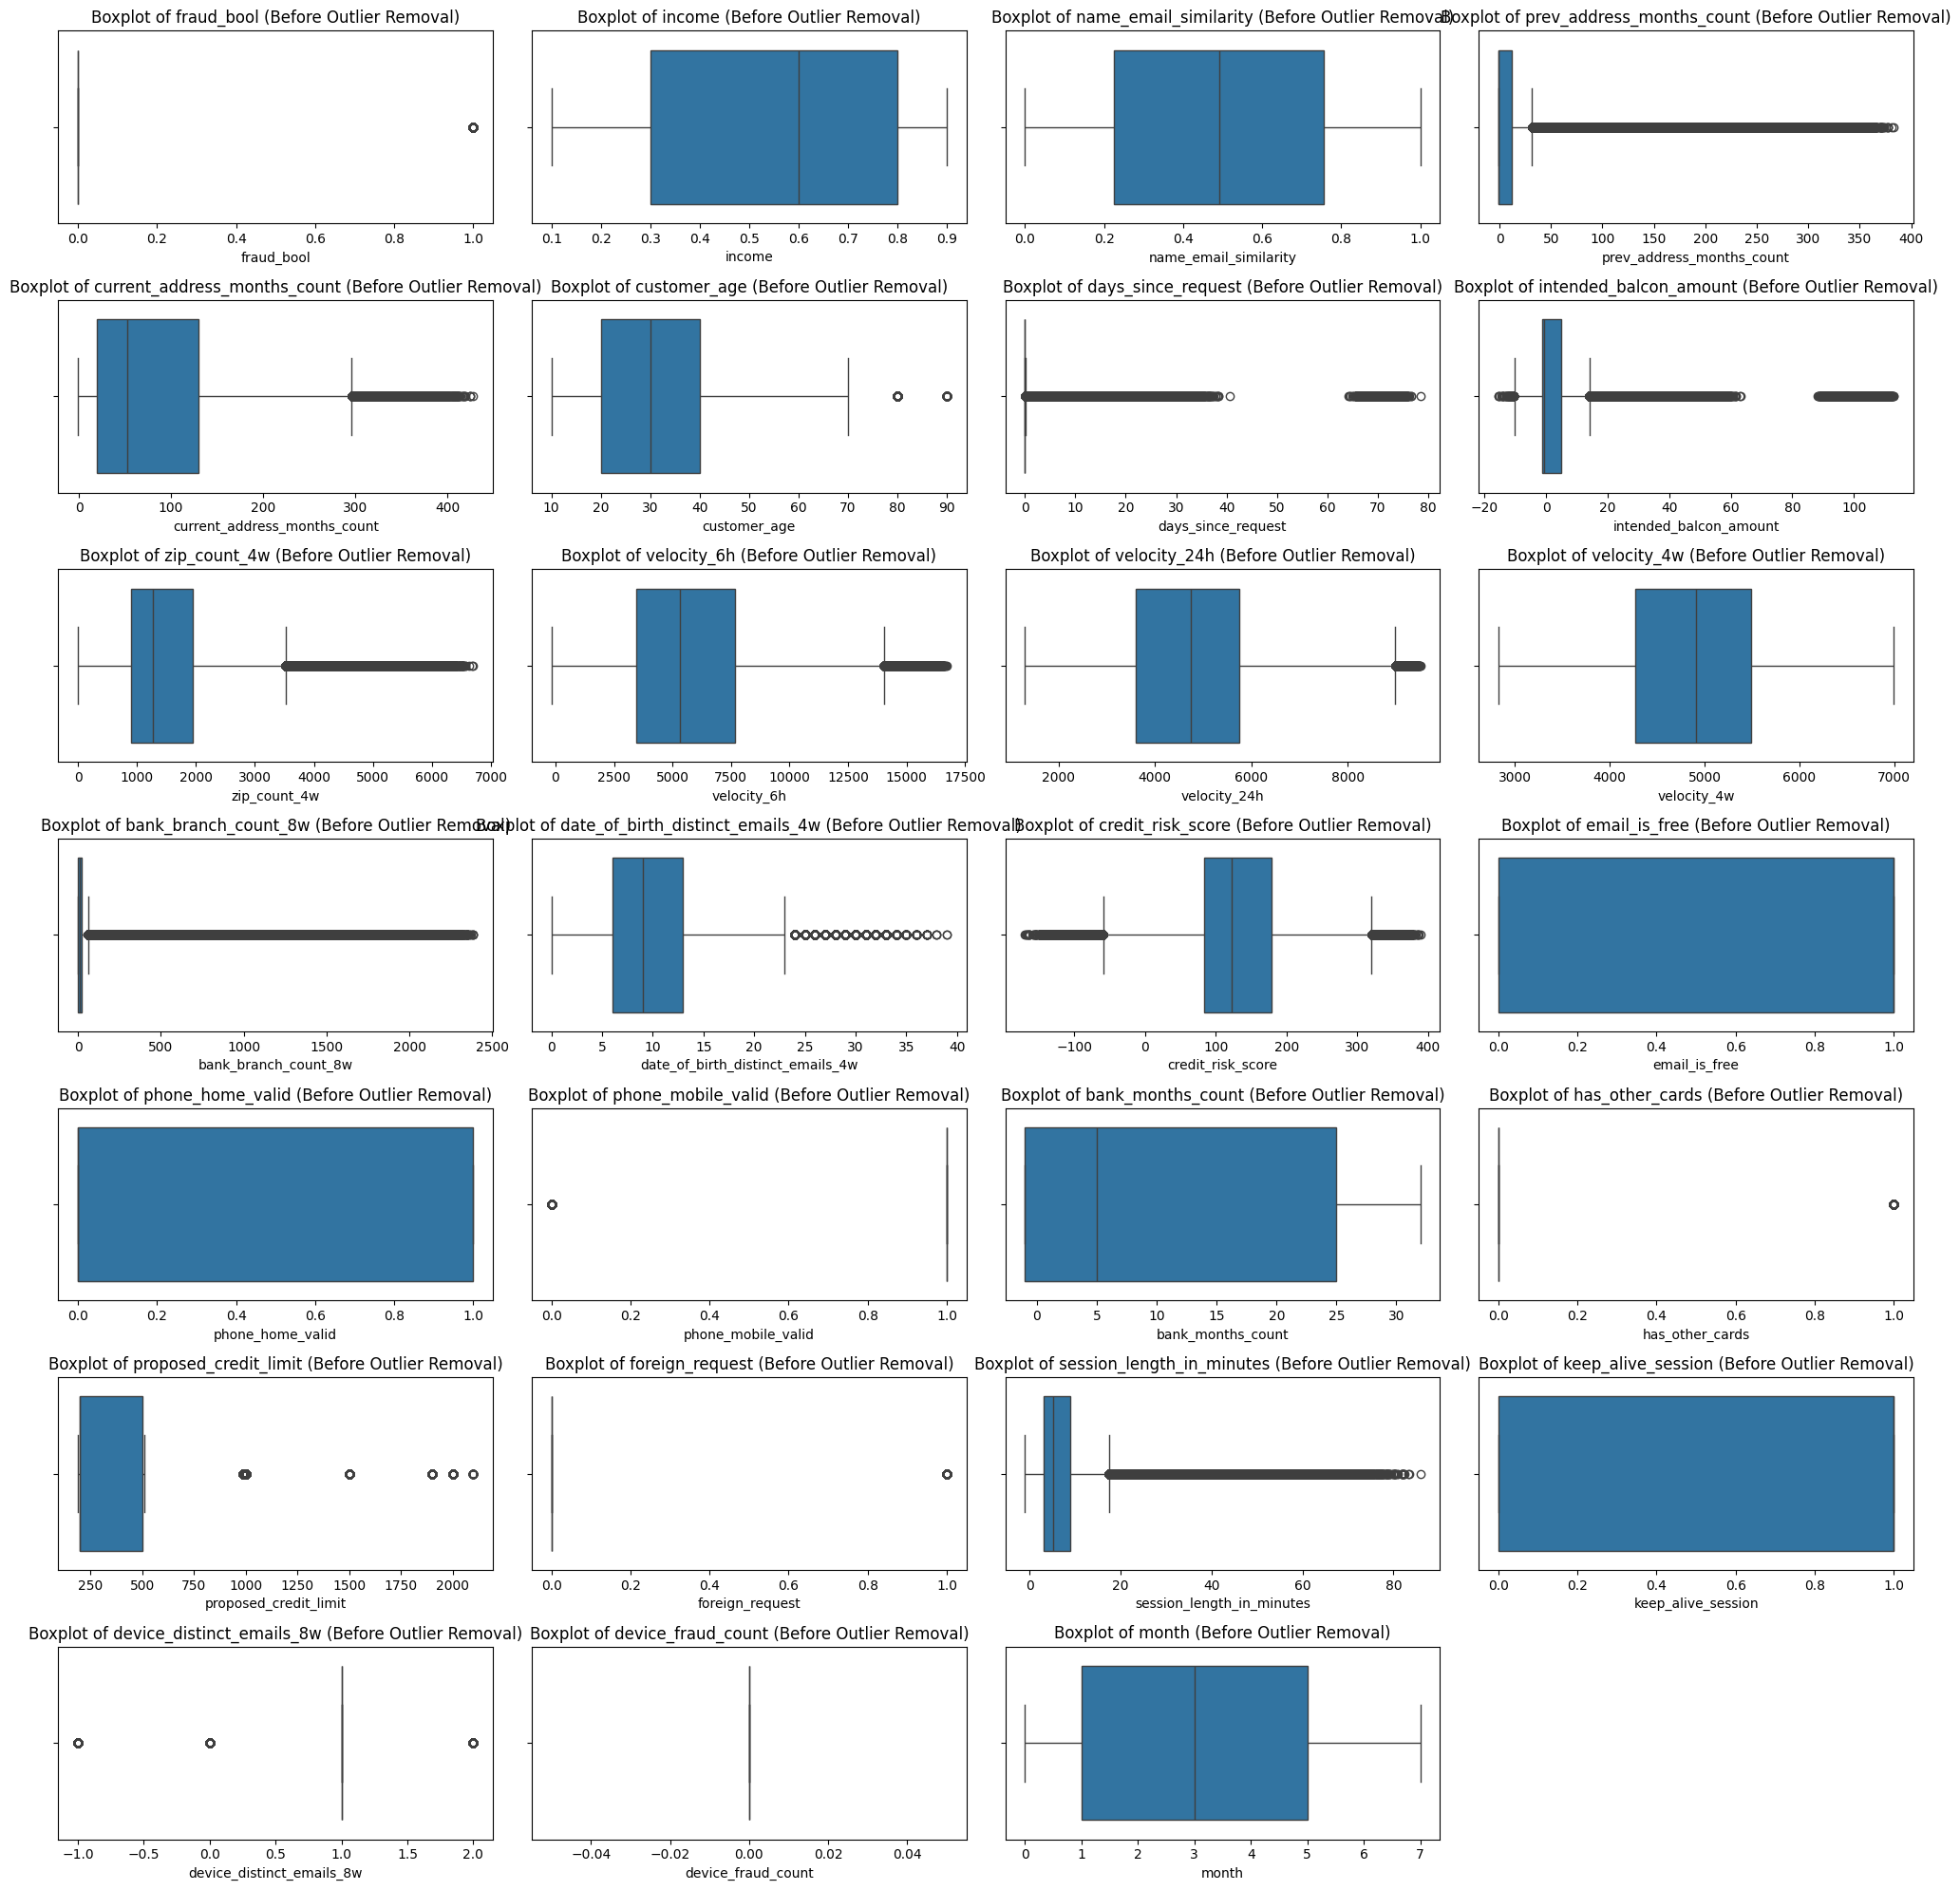

In [5]:
# Detect outliers using Isolation Forest
num_cols = data.select_dtypes(include=[np.number]).columns
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
outlier_predictions = isolation_forest.fit_predict(data[num_cols])

# Visualize outliers before handling
plt.figure(figsize=(20, 20))  # Adjusted for all numerical features
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols) // 4 + 1, 4, i + 1)  # Create a grid layout for subplots
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col} (Before Outlier Removal)")
plt.tight_layout()
plt.show()

In [6]:
# Separate features and target
X = data.drop(columns=['fraud_bool'])  # 'fraud_bool' is the target column
y = data['fraud_bool']

# Numerical and Categorical Features
num_cols = X.select_dtypes(include=[np.number]).columns
cat_cols = X.select_dtypes(include=["object", "category"]).columns

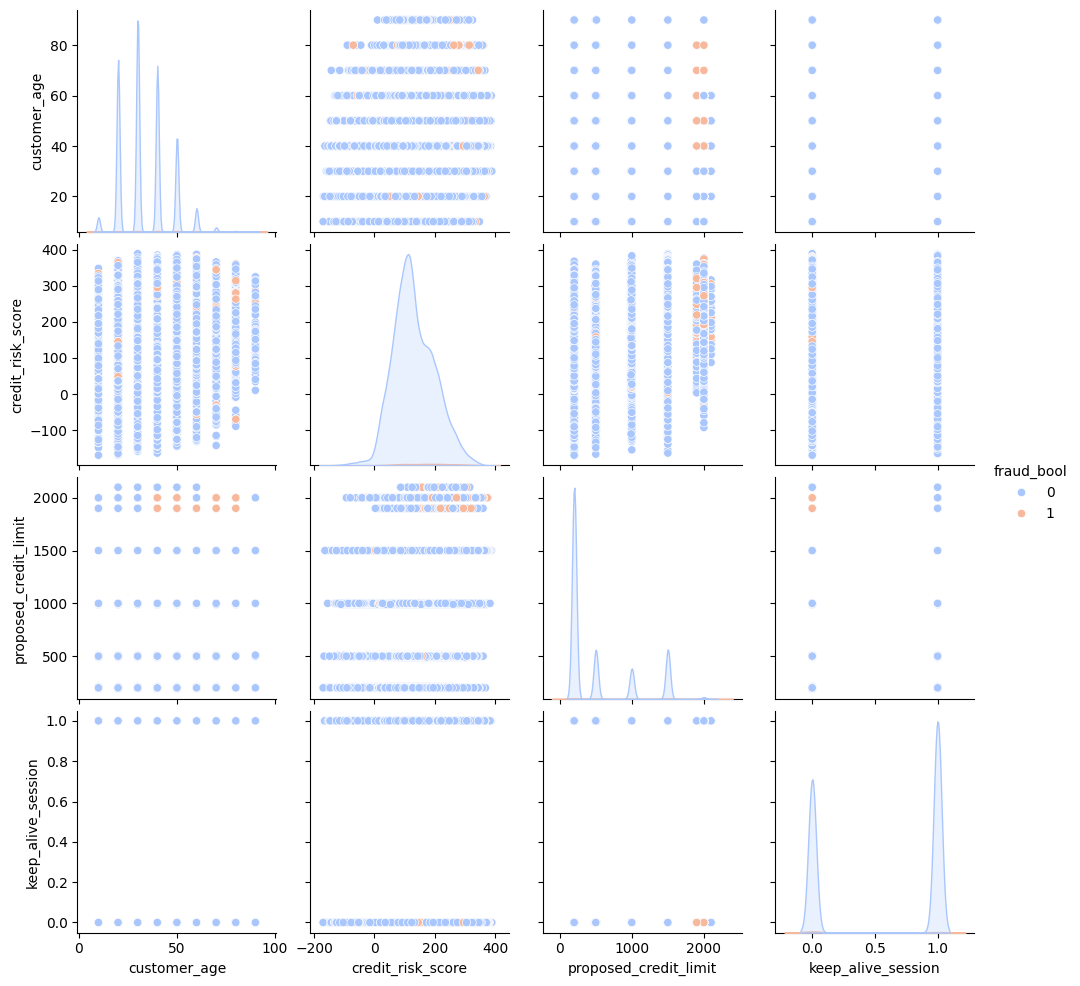

In [8]:
# Pairplot for Highly Correlated Features
correlated_features = correlation_matrix[correlation_matrix.abs() > 0.05].index  # Threshold for high correlation
sns.pairplot(data=data, vars=correlated_features, hue='fraud_bool', palette='coolwarm')
plt.show()

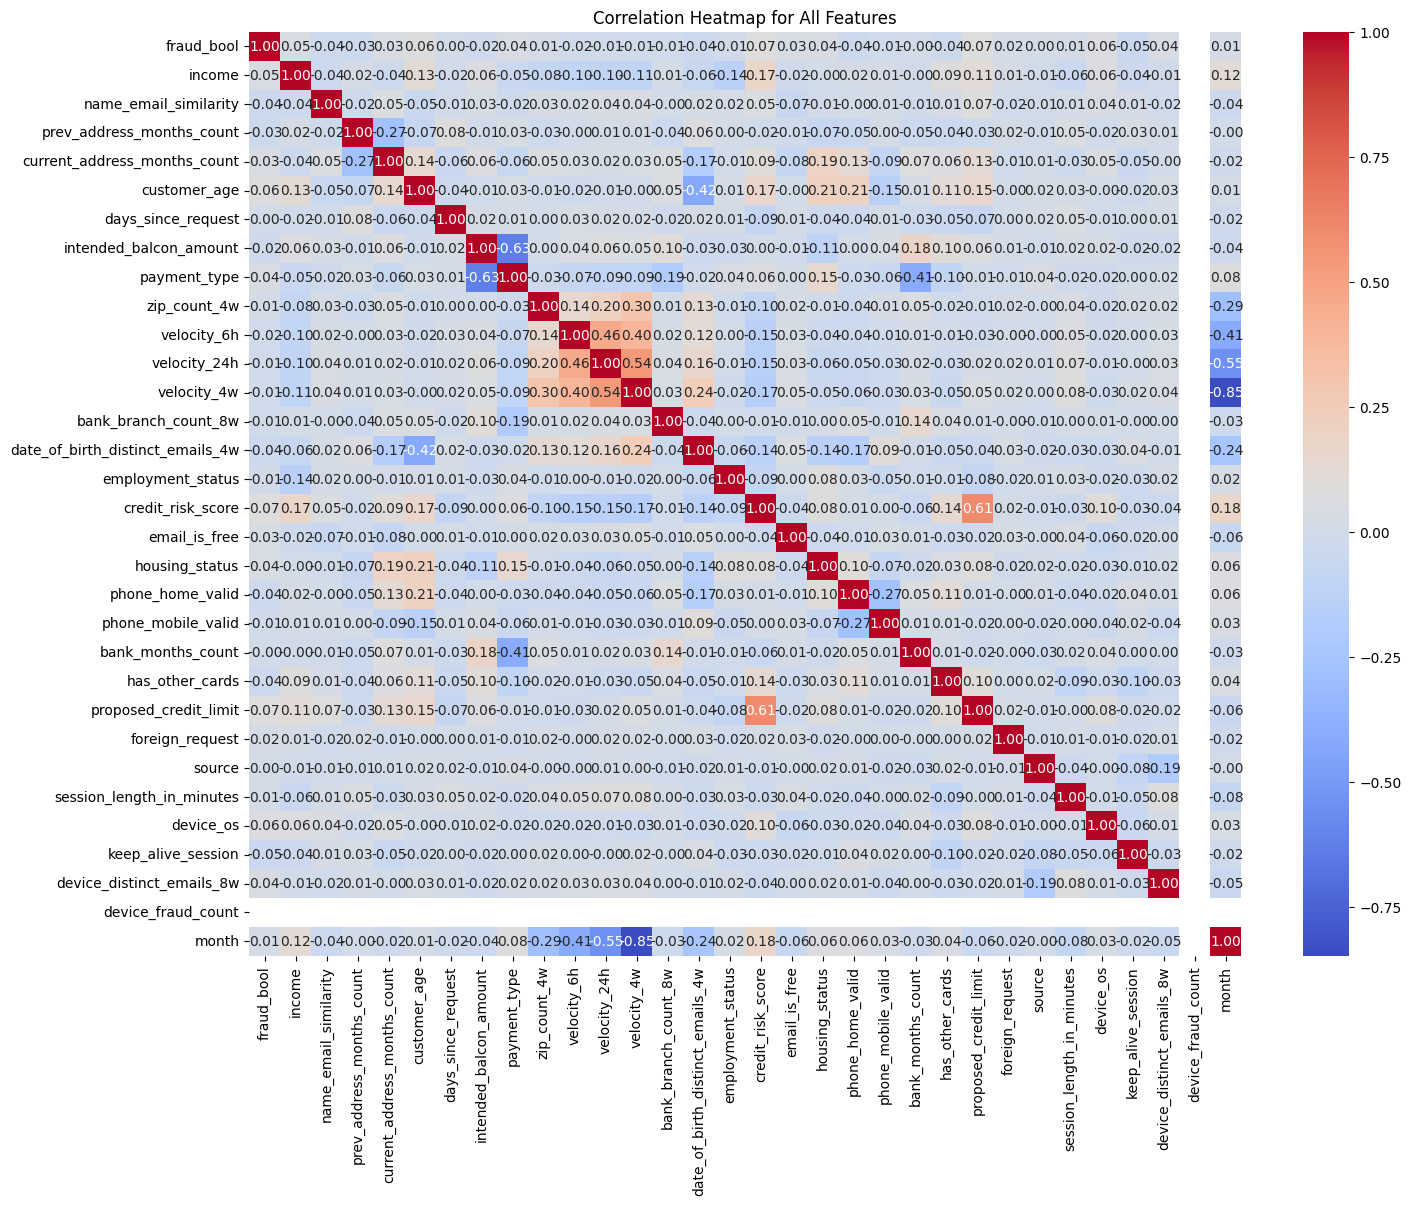

In [9]:
# Heatmap for All Features
plt.figure(figsize=(16, 12))
heatmap_data = data.copy()
for col in cat_cols:
    heatmap_data[col] = pd.factorize(heatmap_data[col])[0]  # Encode categorical features
sns.heatmap(heatmap_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap for All Features")
plt.show()

In [11]:
# Summary of Feature Relevance
print("\nTop Features by Correlation:")
print(correlation_matrix.sort_values(ascending=False).head())

print("\nTop Features by ANOVA F-Test:")
print(anova_scores.sort_values(ascending=False).head())



Top Features by Correlation:
credit_risk_score            0.070624
proposed_credit_limit        0.068907
customer_age                 0.062959
income                       0.045079
device_distinct_emails_8w    0.035704
dtype: float64

Top Features by ANOVA F-Test:
credit_risk_score        5012.689169
proposed_credit_limit    4770.766210
customer_age             3979.557852
keep_alive_session       2536.139830
income                   2036.265870
dtype: float64


In [12]:
# Summary of Feature Relevance
print("\nWorst Features by Correlation:")
print(correlation_matrix.sort_values(ascending=True).head())

print("\nWorst Features by ANOVA F-Test:")
print(anova_scores.sort_values(ascending=True).head())


Worst Features by Correlation:
keep_alive_session                 -0.050296
date_of_birth_distinct_emails_4w   -0.043224
name_email_similarity              -0.036720
has_other_cards                    -0.035156
phone_home_valid                   -0.035128
dtype: float64

Worst Features by ANOVA F-Test:
days_since_request             0.321805
bank_months_count             10.383121
zip_count_4w                  27.165194
session_length_in_minutes     80.996857
velocity_24h                 125.074325
dtype: float64


In [ ]:
# Drop irrelevant columns
data = data.drop(columns=[
    'date_of_birth_distinct_emails_4w',
    'bank_branch_count_8w',
    'device_fraud_count',
    'zip_count_4w',
    'velocity_24h',
    'velocity_4w'
])
